In [163]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
!pip install lightgbm catboost
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split,StratifiedKFold,GridSearchCV,RandomizedSearchCV
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.neural_network import MLPClassifier
from sklearn.decomposition import PCA
from sklearn.metrics import roc_curve, auc
import matplotlib.patches as mpatches

In [164]:
df = pd.read_csv("water_potability.csv")
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [165]:
df.isnull().sum()

,0
ph,491
Hardness,0
Solids,0
Chloramines,0
Sulfate,781
Conductivity,0
Organic_carbon,0
Trihalomethanes,162
Turbidity,0
Potability,0


In [166]:
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [167]:
df['Hardness_Group']=pd.cut(df['Hardness'],bins=5,labels=False)
df['ph'] = df['ph'].fillna(df.groupby('Hardness_Group')['ph'].transform('mean'))
df['Sulfate'] = df['Sulfate'].fillna(df.groupby('Hardness_Group')['Sulfate'].transform('mean'))
df['Trihalomethanes'] = df['Trihalomethanes'].fillna(df['Trihalomethanes'].mean())

In [168]:
df.drop('Hardness_Group',axis=1,inplace=True)
df['ph_danger']= df['ph'].apply(lambda x: 1 if (6.5<x<8.5) else 0)

In [169]:
df['Solids_Log'] = np.log1p(df['Solids'])
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability,ph_danger,Solids_Log
0,7.028374,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0,1,9.942339
1,3.716080,129.422921,18630.057858,6.635246,341.576291,592.885359,15.180013,56.329076,4.500656,0,0,9.832585
2,8.099124,224.236259,19909.541732,9.275884,327.283200,418.606213,16.868637,66.420093,3.055934,0,1,9.899005
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0,1,9.999680
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0,0,9.797015


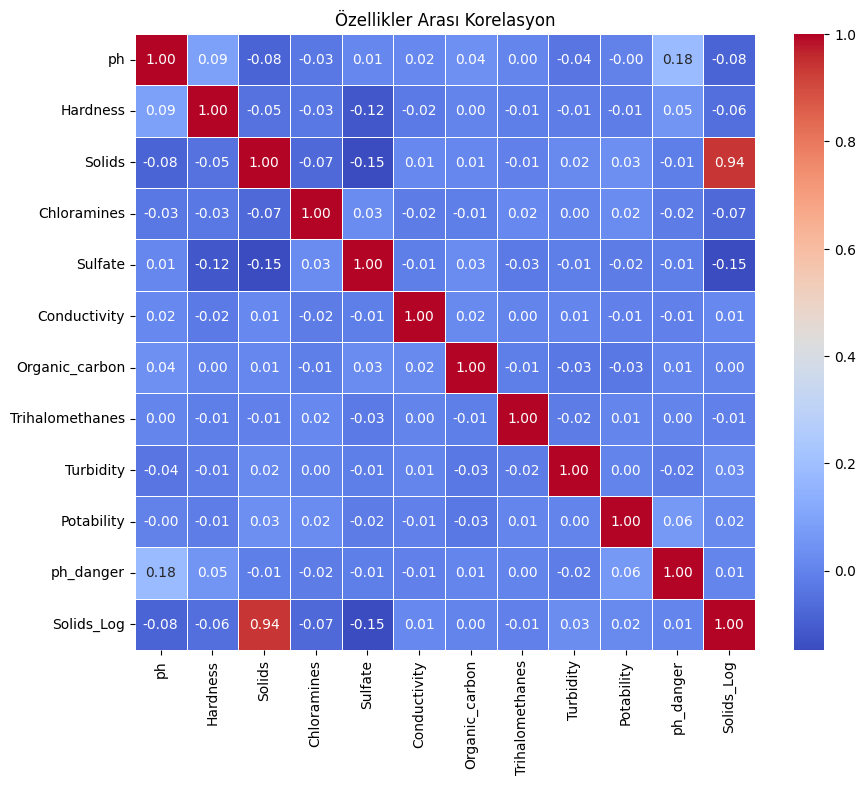

In [170]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Özellikler Arası Korelasyon')
plt.show()

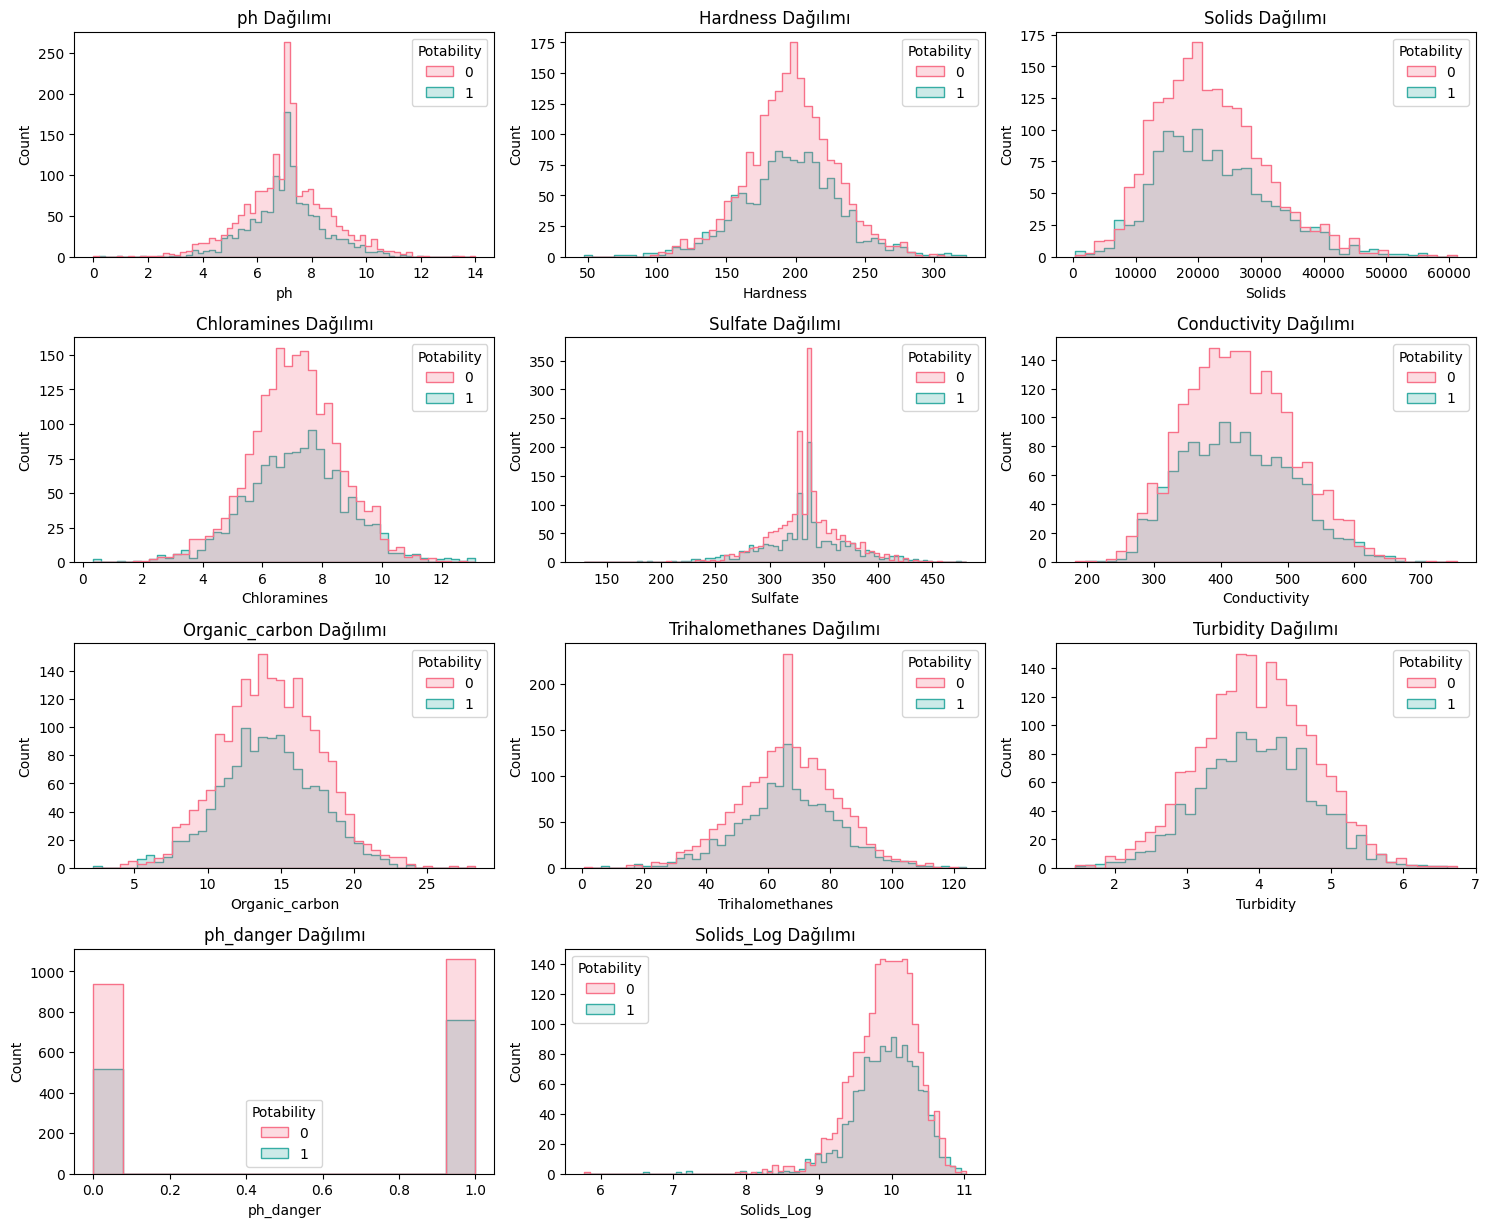

In [171]:
cols = df.drop('Potability', axis=1).columns

plt.figure(figsize=(15, 15))
for i, col in enumerate(cols, 1):
    plt.subplot(5, 3, i)
    sns.histplot(data=df, x=col, hue='Potability', kde=False, element="step", palette='husl')
    plt.title(f'{col} Dağılımı')

plt.tight_layout()
plt.show()

/tmp/ipython-input-541039676.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Potability', data=df, palette='viridis')


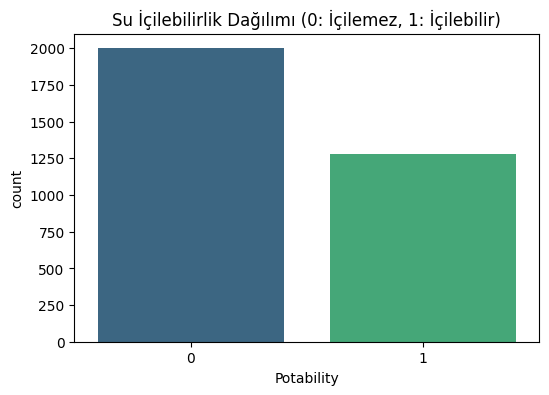

Potability
0    61%
1    39%
Name: proportion, dtype: object


In [172]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Potability', data=df, palette='viridis')
plt.title('Su İçilebilirlik Dağılımı (0: İçilemez, 1: İçilebilir)')
plt.show()

print((df['Potability'].value_counts(normalize=True).map("{:.0%}".format)))

In [173]:
x_train, x_test, y_train, y_test = train_test_split(
    df.drop("Potability", axis=1),
    df["Potability"],
    test_size=0.2,
    random_state=42,
    stratify=df["Potability"]
)
print(f"SMOTE Öncesi Train Seti Dağılımı:\n{y_train.value_counts()}")

smote=SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(x_train, y_train)
print(f"\nSMOTE Sonrası Train Seti Dağılımı:\n{y_train_resampled.value_counts()}")

SMOTE Öncesi Train Seti Dağılımı:
Potability
0    1598
1    1022
Name: count, dtype: int64

SMOTE Sonrası Train Seti Dağılımı:
Potability
0    1598
1    1598
Name: count, dtype: int64


Fitting 4 folds for each of 30 candidates, totalling 120 fits

En İyi Parametreler: {'learning_rate': 0.05, 'l2_leaf_reg': 5, 'iterations': 1750, 'depth': 7, 'border_count': 32}
CatBoost Modeli Genel Başarı: %62.80
Sınıflandırma Raporu: 
               precision    recall  f1-score   support

           0       0.68      0.72      0.70       400
           1       0.53      0.48      0.50       256

    accuracy                           0.63       656
   macro avg       0.60      0.60      0.60       656
weighted avg       0.62      0.63      0.62       656



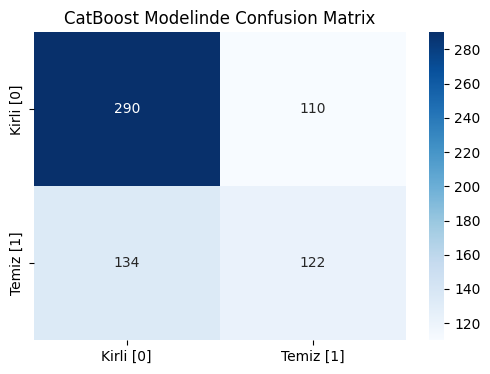

In [174]:
base_cat_model = CatBoostClassifier(
    loss_function='Logloss',
    random_seed=42,
    verbose=0
)
param_dist = {
    'iterations': [750,1000, 1250, 1500, 1750],
    'learning_rate': [0.01, 0.03, 0.05, 0.1, 1.0],
    'depth': [3, 4, 5, 6, 7],
    'l2_leaf_reg': [13,11, 5, 7, 9,3],
    'border_count': [16, 32, 64,128]
}
random_search = RandomizedSearchCV(
    estimator=base_cat_model,
    param_distributions=param_dist,
    n_iter=30,
    scoring='accuracy',
    cv=StratifiedKFold(n_splits=4),
    verbose=1,
    random_state=42,
    n_jobs=-1
)

random_search.fit(X_train_resampled, y_train_resampled)
print(f"\nEn İyi Parametreler: {random_search.best_params_}")
best_cat_model = random_search.best_estimator_
y_pred_cat = best_cat_model.predict(x_test)

print(f"CatBoost Modeli Genel Başarı: %{accuracy_score(y_test,y_pred_cat)*100:.2f}")
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_cat), annot=True, fmt='d', cmap='Blues',
            xticklabels=['Kirli [0]','Temiz [1]'],
            yticklabels=['Kirli [0]','Temiz [1]'])
plt.title('CatBoost Modelinde Confusion Matrix')
print("Sınıflandırma Raporu: \n",classification_report(y_test,y_pred_cat))

SVM Modeli Genel Başarı: %61.13
Sınıflandırma Raporu: 
               precision    recall  f1-score   support

           0       0.67      0.70      0.69       400
           1       0.50      0.47      0.49       256

    accuracy                           0.61       656
   macro avg       0.59      0.59      0.59       656
weighted avg       0.61      0.61      0.61       656



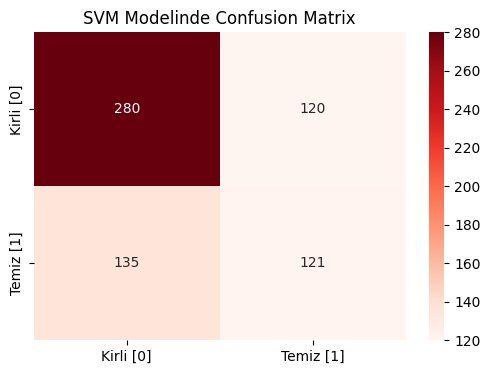

In [180]:
svm_model = make_pipeline(
    StandardScaler(),
    SVC(
        kernel='rbf',
        C=1.0,
        gamma='scale',
        random_state=42
    )
)
svm_model.fit(X_train_resampled, y_train_resampled)
y_pred_svm = svm_model.predict(x_test)
print(f"SVM Modeli Genel Başarı: %{accuracy_score(y_test,y_pred_svm)*100:.2f}")
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_svm), annot=True, fmt='d', cmap='Reds',
            xticklabels=['Kirli [0]','Temiz [1]'],
            yticklabels=['Kirli [0]','Temiz [1]'])
plt.title('SVM Modelinde Confusion Matrix')
print("Sınıflandırma Raporu: \n",classification_report(y_test,y_pred_svm))


MLP Modeli Genel Başarı: %66.01
Sınıflandırma Raporu: 
               precision    recall  f1-score   support

           0       0.71      0.76      0.73       400
           1       0.57      0.50      0.54       256

    accuracy                           0.66       656
   macro avg       0.64      0.63      0.63       656
weighted avg       0.65      0.66      0.66       656



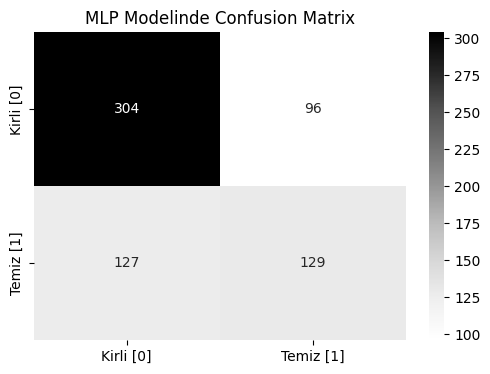

In [181]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(x_test)

mlp_model_v2 = MLPClassifier(
    hidden_layer_sizes=(128, 64),
    activation='tanh',
    solver='adam',
    alpha=0.15,
    learning_rate='constant',
    learning_rate_init=0.001,
    batch_size=32,
    max_iter=2000,
    early_stopping=True,
    n_iter_no_change=20,
    validation_fraction=0.1,
    random_state=42,
    verbose=False
)
mlp_model_v2.fit(X_train_scaled, y_train_resampled)
y_pred_mlp_v2 = mlp_model_v2.predict(X_test_scaled)

print(f"\nMLP Modeli Genel Başarı: %{accuracy_score(y_test,y_pred_mlp_v2)*100:.2f}")
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_mlp_v2), annot=True, fmt='d', cmap='Grays',
            xticklabels=['Kirli [0]','Temiz [1]'],
            yticklabels=['Kirli [0]','Temiz [1]'])
plt.title('MLP Modelinde Confusion Matrix')
print("Sınıflandırma Raporu: \n",classification_report(y_test,y_pred_mlp_v2))

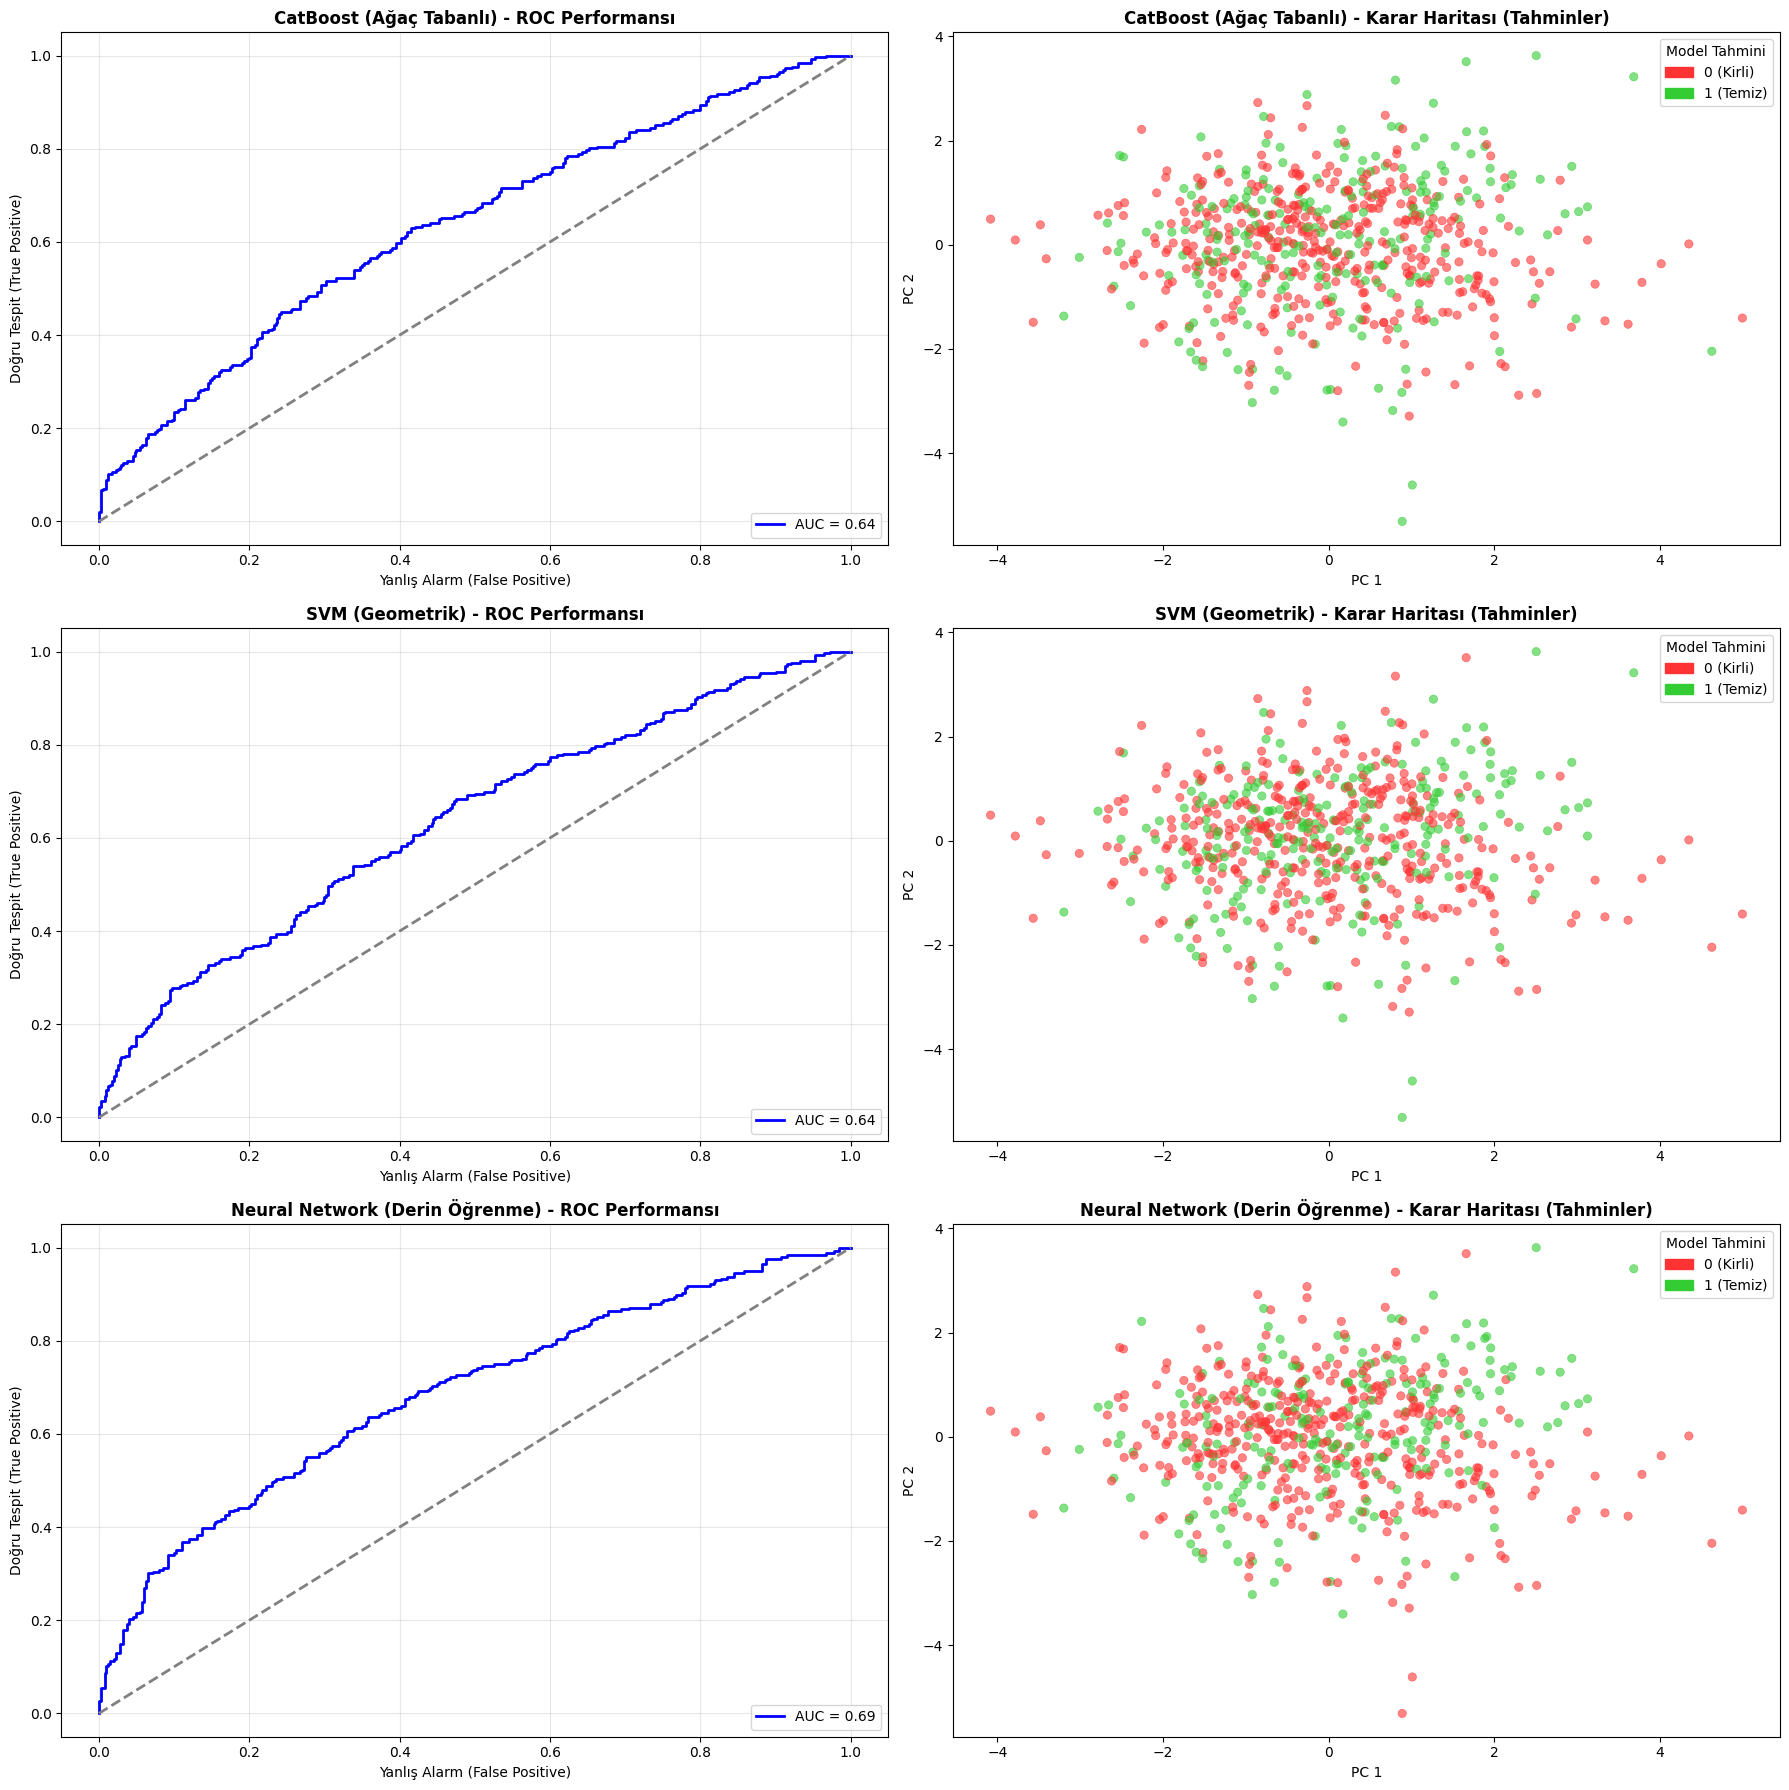

In [177]:
pca = PCA(n_components=2)
X_test_pca = pca.fit_transform(X_test_scaled)

models_setup = [
    ("CatBoost (Ağaç Tabanlı)", best_cat_model, x_test),
    ("SVM (Geometrik)", svm_model, x_test),
    ("Neural Network (Derin Öğrenme)", mlp_model_v2, X_test_scaled)
]

# Grafik Alanı
fig, axes = plt.subplots(3, 2, figsize=(18, 18))
plt.subplots_adjust(hspace=0.4)

colors = {0: '#FF3333', 1: '#33CC33'}

for i, (name, model, data) in enumerate(models_setup):
    y_pred = model.predict(data)
    if hasattr(model, "predict_proba"):
        y_proba = model.predict_proba(data)[:, 1]
    else:
        y_proba = model.decision_function(data)
        y_proba = (y_proba - y_proba.min()) / (y_proba.max() - y_proba.min())

    # --- SOL GRAFİK: ROC CURVE ---
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)

    ax_roc = axes[i, 0]
    ax_roc.plot(fpr, tpr, color='blue', lw=2, label=f'AUC = {roc_auc:.2f}')
    ax_roc.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
    ax_roc.set_title(f'{name} - ROC Performansı', fontsize=12, fontweight='bold')
    ax_roc.set_xlabel('Yanlış Alarm (False Positive)')
    ax_roc.set_ylabel('Doğru Tespit (True Positive)')
    ax_roc.legend(loc="lower right")
    ax_roc.grid(True, alpha=0.3)

    # --- SAĞ GRAFİK: PCA KARAR HARİTASI ---
    ax_pca = axes[i, 1]
    plot_colors = [colors[label] for label in y_pred]

    sns.scatterplot(
        x=X_test_pca[:, 0],
        y=X_test_pca[:, 1],
        c=plot_colors,
        alpha=0.6,
        edgecolor=None,
        ax=ax_pca
    )
    legend_handles = [
        mpatches.Patch(color=colors[0], label='0 (Kirli)'),
        mpatches.Patch(color=colors[1], label='1 (Temiz)')
    ]

    ax_pca.set_title(f'{name} - Karar Haritası (Tahminler)', fontsize=12, fontweight='bold')
    ax_pca.set_xlabel('PC 1')
    ax_pca.set_ylabel('PC 2')
    ax_pca.legend(handles=legend_handles, title='Model Tahmini')

plt.tight_layout()
plt.show()